# Probabilistic Models: Logistic Regression

Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on. Multinomial logistic regression can model scenarios where there are more than two possible discrete outcomes. Logistic regression is a useful analysis method for classification problems, where you are trying to determine if a new sample fits best into a category. As aspects of cyber security are classification problems, such as attack detection, logistic regression is a useful analytic technique.[Thomas W. Edgar, David O. Manz, 2017](https://doi.org/10.1016/B978-0-12-805349-2.00004-2)

## Real-Life Examples

### Medical Diagnosis

Logistic regression is widely used in medical research for predicting the probability of a patient having a particular medical condition. For instance, it can be applied to predict whether a patient is at risk of developing diabetes based on features like age, BMI, and blood pressure.

### Credit Scoring

In the financial industry, logistic regression is used for credit scoring. Lenders can predict the probability of a borrower defaulting on a loan based on historical data, income, and credit scores. This helps in making informed decisions about approving or denying loan applications.

### Email Spam Detection

Logistic regression is also employed in email spam detection. Given features such as email content, sender information, and attachment types, the model can predict the probability of an email being spam or not. This is crucial for filtering out unwanted emails.


## Basics of Logistic Regression

### Logistic Function

The logistic function, also known as the sigmoid function, is the core of logistic regression.

A mathematical function that "squishes" an input value into a constrained range, typically 0 to 1 or -1 to +1. That is, you can pass any number (two, a million, negative billion, whatever) to a sigmoid and the output will still be in the constrained range.

#### The formula is given by:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

where \(z\) is the linear combination of input features and model parameters.

#### Let's consider code representation:

In [30]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### A plot of the sigmoid activation function looks as follows:

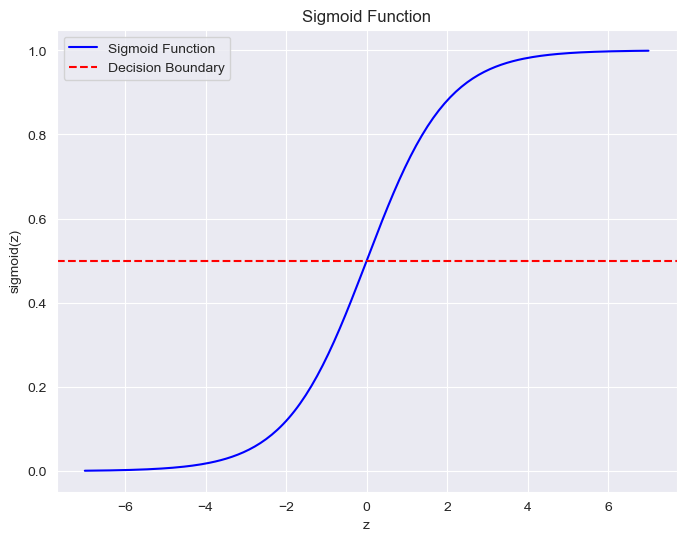

In [31]:
import matplotlib.pyplot as plt

z_values = np.linspace(-7, 7, 200)

# Calculate corresponding sigmoid values
sigmoid_values = sigmoid(z_values)

# Plot the sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(z_values, sigmoid_values, label='Sigmoid Function', color='blue')
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

### Model Representation

The logistic regression model can be represented as:

$$
P(Y=1|X) = \sigma(W^TX + b)
$$

Here, \(P(Y=1|X)\) is the probability of the target variable \(Y\) being 1 given the input features \(X\), and \(W\) and \(b\) are the weight vector and bias term, respectively.

In [32]:
def predict(X, weights):
    return sigmoid(np.dot(X, weights))

## Training Logistic Regression

### Loss Function

To train the logistic regression model, we need to define a loss function. The most common choice is the binary cross-entropy loss, given by:

$$
L(Y, \hat{Y}) = - \frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})]
$$

where \(m\) is the number of training examples, $(y^{(i)})$ is the true label, and $(\hat{y}^{(i)})$ is the predicted probability.



In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
def logistic_regression(X_train, y_train, learning_rate=0.01, epochs=1000):
    # Add a column of ones to X_train for the bias term
    X_train = np.column_stack((np.ones(len(X_train)), X_train))
    
    # Initialize weights
    weights = np.zeros(X_train.shape[1])

    for epoch in range(epochs):
        # Calculate predicted probabilities
        predictions = predict(X_train, weights)

        # Update weights using gradient descent
        gradient = np.dot(X_train.T, (predictions - y_train)) / len(y_train)
        weights -= learning_rate * gradient

    return weights


## Question 1
Suppose we had a logistic regression model with three features that learned the following bias and weights:

$$b = 1$$

$$w_1 = 2$$

$$w_2 = -1$$

$$w_3 = 5$$

Further suppose the following feature values for a given example:

$$x_1 = 0$$

$$x_2 = 10$$

$$x_3 = 2$$

Therefore, the log-odds:
$$b + w_1x_1 + w_2x_2 + w_3x_3$$

```{note}
Substitute the values into the formula!
```

<span style="display:none" id="q1">W3sicXVlc3Rpb24iOiAiRW50ZXIgdGhlIHZhbHVlIG9mIGxvZy1vZGRzOiIsICJ0eXBlIjogIm51bWVyaWMiLCAicHJlY2lzaW9uIjogMSwgImFuc3dlcnMiOiBbeyJ0eXBlIjogInZhbHVlIiwgInZhbHVlIjogMSwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiQ29ycmVjdC4ifSwgeyJ0eXBlIjogImRlZmF1bHQiLCAiZmVlZGJhY2siOiAiVHJ5IGFnYWluLiJ9XX1d</span>

In [34]:
from jupyterquiz import display_quiz

display_quiz('#q1')

<IPython.core.display.Javascript object>

## Question 2
$$
y = \frac{1}{1 + e^{-z}} = 
$$

<span style="display:none" id="q2">W3sicXVlc3Rpb24iOiAiRW50ZXIgdGhlIHZhbHVlIG9mIGxvZ2lzdGljIHJlZ3Jlc3Npb24gKHdpbGwgYmUgY2hlY2tlZCB0byAzIGRlY2ltYWwgcGxhY2VzKToiLCAidHlwZSI6ICJudW1lcmljIiwgInByZWNpc2lvbiI6IDMsICJhbnN3ZXJzIjogW3sidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDAuNzMxLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0LiJ9LCB7InR5cGUiOiAicmFuZ2UiLCAicmFuZ2UiOiBbMC43MzEsIDAuNzMxNF0sICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIlRydWUgdG8gMyBkZWNpbWFsIHBsYWNlcywgYnV0IGFuc3dlciBpcyBYLlhYWCJ9LCB7InR5cGUiOiAicmFuZ2UiLCAicmFuZ2UiOiBbLTEwMDAwMDAwMCwgLTFlLTA2XSwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIlRoZSByYW5nZSBvZiBsb2dpc3RpYyByZWdyZXNzaW9uIGlzIGluIFswICwgMV0uIFRyeSBhZ2Fpbi4ifSwgeyJ0eXBlIjogInJhbmdlIiwgInJhbmdlIjogWzEuMDAwMDAxLCAxMDAwMDAwMDBdLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiVGhlIHJhbmdlIG9mIGxvZ2lzdGljIHJlZ3Jlc3Npb24gaXMgaW4gWzAgLCAxXS4gVHJ5IGFnYWluLiJ9LCB7InR5cGUiOiAiZGVmYXVsdCIsICJmZWVkYmFjayI6ICJUcnkgYWdhaW4uIn1dfV0=</span>

In [35]:
display_quiz('#q2')

<IPython.core.display.Javascript object>

## Examples
As previously stated, logistic regression is useful in medical research, credit scoring, and even email spam detection. 

Consider a logistic regression model that computes the likelihood of an input email being spam or not spam. Assume the model predicts 0.72 during inference. As a result, the model estimates:

The email has a 72% chance of being spam.
There is a 28% chance that the email is not spam.


A logistic regression model employs the two-step architecture described below:
1. Using a linear function of input features, the model generates a raw prediction (y').

2. The model feeds the raw prediction into a sigmoid function, which converts it to a value between 0 and 1, exclusive.


A logistic regression model, like any other regression model, predicts a number. This number, however, is typically used in a binary classification model as follows:

* The binary classification model predicts the positive class if the predicted number is greater than the classification threshold.
* The binary classification model predicts the negative class if the predicted number is less than the classification threshold.

In [36]:
# Email Spam Detection
num_samples = 1000
# Generate random email spam detection data
email_content_length = np.random.normal(200, 50, num_samples)
sender_blacklist_prob = np.random.uniform(0, 1, num_samples)
attachment_types_prob = np.random.uniform(0, 1, num_samples)

# Create a binary target variable (1 for spam, 0 for not spam)
spam_prob = 1 / (1 + np.exp(-(0.001 * email_content_length + 0.5 * sender_blacklist_prob - 0.2 * attachment_types_prob - 5)))
spam_labels = np.random.binomial(1, spam_prob)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    np.column_stack((email_content_length, sender_blacklist_prob, attachment_types_prob)),
    spam_labels,
    test_size=0.2,
    random_state=42
)

# Initialize the logistic regression model
spam_model = LogisticRegression()

# Fit the model on the training data
spam_model.fit(X_train, y_train)

# Predict on the test data
y_pred_spam = spam_model.predict(X_test)

# Calculate accuracy
accuracy_spam = accuracy_score(y_test, y_pred_spam)
print(f"Email Spam Detection Accuracy: {accuracy_spam}")

Email Spam Detection Accuracy: 0.995


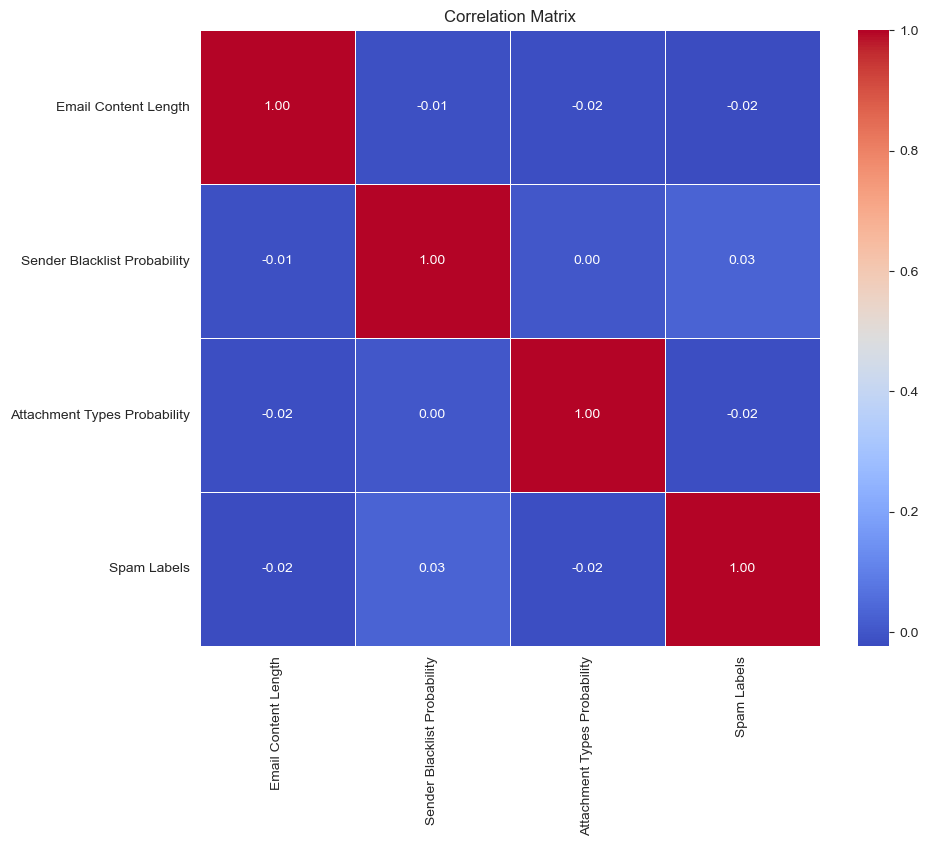

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Create a DataFrame
data = pd.DataFrame({
    'Email Content Length': email_content_length,
    'Sender Blacklist Probability': sender_blacklist_prob,
    'Attachment Types Probability': attachment_types_prob,
    'Spam Labels': spam_labels
})

# Calculate correlations
correlation_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

# Conclusion

Finally, the logistic regression model is an effective and widely used tool in machine learning and statistics. We have gone over the key concepts and techniques associated with logistic regression and its applications throughout this presentation.

We started by learning the fundamentals of logistic regression, which is a binary classification algorithm that predicts the likelihood of an event occurring. The logistic function, which allows us to map the linear regression output to a probability between 0 and 1, was discussed. Based on the predicted probabilities, we can make informed decisions.

Following that, we looked at the key components of logistic regression, such as log-odds, the cost function, and maximum likelihood estimation. We investigated how these components interact to optimize model parameters and make accurate predictions.

In this e-book, we also covered a variety of practical issues, such as feature selection, regularization techniques, and dealing with imbalanced datasets. These factors are critical for developing robust and generalizable logistic regression models.

Finally, we looked at real-world applications of logistic regression in fields such as healthcare, finance, marketing, and social sciences. Logistic regression has been shown to be effective in predicting disease outcomes, credit risk assessment, customer churn, and a variety of other applications requiring binary classification.

Finally, logistic regression is a versatile and useful tool in the data scientist's toolbox. Its ease of use, interpretability, and breadth of applications make it a popular choice for binary classification problems. We can harness the power of logistic regression to make accurate predictions and drive actionable insights by understanding the underlying principles, leveraging appropriate evaluation metrics, and considering practical considerations.


# Check yourself

<span style="display:none" id="q3">W3sicXVlc3Rpb24iOiAiV2hlcmUgY2FuIGxvZ2lzdGljIHJlZ3Jlc3Npb24gYmUgdXNlZD8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIlNwYW0gZGV0ZWN0aW9uIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiQ29ycmVjdC4ifSwgeyJhbnN3ZXIiOiAiQ3JlZGl0IHNjb3JpbmciLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0LiJ9LCB7ImFuc3dlciI6ICJNZWRpY2luZSIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QuIn1dfV0=</span>

In [38]:
display_quiz('#q3')

<IPython.core.display.Javascript object>

<span style="display:none" id="q4">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyBhIHJhbmdlIHZhbHVlIG9mIGxvZ2lzdGljIHJlZ3Jlc3Npb24/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJbLTEgLCAwXSIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QifSwgeyJhbnN3ZXIiOiAiWzAgLCAxXSIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QuIn0sIHsiYW5zd2VyIjogIlstXHUyMjFlLCArXHUyMjFlXSIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QifV19XQ==</span>

In [39]:
display_quiz('#q4')

<IPython.core.display.Javascript object>

<span style="display:none" id="q5">W3sicXVlc3Rpb24iOiAiSW4gdGhlIGFib3ZlIHF1ZXN0aW9uLCB3aGljaCBmdW5jdGlvbiBtYWtlcyAncCcgYmV0d2VlbiAoMCwxKT8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIkxvZ2lzdGljIGZ1bmN0aW9uIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiQ29ycmVjdC4ifSwgeyJhbnN3ZXIiOiAiTG9nIGxpa2VsaWhvb2QgZnVuY3Rpb24iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiJ9LCB7ImFuc3dlciI6ICJNaXh0dXJlIG9mIGJvdGgiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiJ9LCB7ImFuc3dlciI6ICJOb25lIG9mIHRoZW0iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiJ9XX1d</span>

In [40]:
display_quiz('#q5')

<IPython.core.display.Javascript object>

# Bibliography

* T. W., & Manz, D. O. (2017). Exploratory Study. In T. W. Edgar & D. O. Manz (Eds.), Research Methods for Cyber Security (pp. 95-130). Syngress. https://doi.org/10.1016/B978-0-12-805349-2.00004-2